# $$\text{Modelo de dividendos continuos}$$

### $$ dS_t = (\alpha - \beta) S_t \, dt + \sigma S_t \, dW_t $$
donde
- $\alpha$ es la tasa libre de riesgo
- $\beta$ es la tasa de dividendos continua
- $\sigma$ es la volatilidad del precio
- $S_t$ es el precio en el momento $t$
- $W_t$ es un proceso de Wiener estándar


#### Sea $Y_t = ln(S_t)$, haciendo uso del lemma de Itô, se tiene que
- $f(x, t) = ln(x)$
- $\frac{\partial f}{\partial t} = 0$
- $\frac{\partial f}{\partial x} = \frac{1}{x}$
- $\frac{\partial^2 f}{\partial x^2} = -\frac{1}{x^2}$
- $\mu' = (\alpha - \beta)S_t$
- $\sigma' = \sigma S_t$

Ahora, 
$$d(Y_t) = d(ln(S_t) = \left(\frac{\partial f(S_t, t)}{\partial t} + \mu' \cdot \frac{\partial f(S_t, t)}{\partial x} + \frac{{\sigma'}^2}{2} \cdot \frac{\partial^2 f(S_t, t)}{\partial x^2} \right)dt + \left(\sigma' \cdot \frac{\partial f(S_t, t)}{\partial x}\right) dW_t$$

$$= \left(0 + (\alpha - \beta) S_t \cdot \frac{1}{S_t} + \frac{\sigma^2}{2}  S_t^2 \cdot \frac{-1}{S_t^2}\right) dt + \left(\sigma S_t \cdot \frac{1}{S_t}\right) dW_t$$

$$= \left(\alpha - \beta  - \frac{\sigma^2}{2}  \right) dt + \sigma dW_t$$

Integrando ambos lados de la ecuación se obtiene:

$$\int_{0}^{t} d(ln(S_t) =  \int_{0}^{t} \left(\alpha - \beta  - \frac{\sigma^2}{2}  \right) dt + \int_{0}^{t} \sigma dW_t$$

donde:
- $\int_{0}^{t} d(ln(S_t) = ln(S_t)\Big|_0^t = ln(S_t) - ln(S_0)$
- $\int_{0}^{t} \left(\alpha - \beta  - \frac{\sigma^2}{2}  \right) dt = \left(\alpha - \beta - \frac{\sigma^2}{2}  \right) t \Big|_0^t =  \left(\alpha - \beta - \frac{\sigma^2}{2}  \right) t$
- $\int_{0}^{t} \sigma dW_t = \sigma (W_t - W_0) = \sigma W_t$

por lo que 
$$ ln(S_t) = ln(S_0) + \left(\alpha - \beta - \frac{\sigma^2}{2}  \right) t + \sigma W_t$$

$$\implies S_t = S_0 \cdot e^{ \left((\alpha - \beta) - \frac{\sigma^2}{2}\right)t + \sigma W_t}$$

$$
\mathbb{E}(S_t) = \mathbb{E}\left[ S_0 \cdot e^{\left((\alpha - \beta) - \frac{\sigma^2}{2}\right)t + \sigma W_t} \right]
$$

$$
\mathbb{E}(S_t) = S_0 \cdot e^{\left((\alpha - \beta) - \frac{\sigma^2}{2}\right)t} \mathbb{E}[e^{(\sigma W_t)}]
$$

$$
\mathbb{E}(S_t) = S_0 \cdot e^{\left((\alpha - \beta) - \frac{\sigma^2}{2}\right)t + \frac{\sigma^2 \cdot t}{2}}
$$

$$
\mathbb{E}(S_t) = S_0 \cdot e^{\left(\alpha - \beta \right)t}
$$

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math
import pandas as pd
import random
import yfinance
import time

In [3]:
class normal:
    def __init__(self, miu, sigma):
        self.a = miu
        self.b = sigma

    def random(self):
        u1 = random.random()
        u2 = random.random()
        v1 = 2 * u1 - 1
        v2 = 2 * u2 - 1
        B = v1**2 + v2**2
        while B > 1:
            u1 = random.random()
            u2 = random.random()
            v1 = 2 * u1 - 1
            v2 = 2 * u2 - 1
            B = v1**2 + v2**2
        z1 = math.sqrt(-2 * math.log(B) / B) * v1 * self.b + self.a
        z2 = math.sqrt(-2 * math.log(B) / B) * v2 * self.b + self.a
        return [z1, z2]

    def randoms(self, n):
        v = []
        k = n % 2
        if k == 1:
            for i in range(0, n // 2):
                v.extend(self.random())
            v.append(self.random()[0])
        else:
            for i in range(0, n // 2):
                v.extend(self.random())
        return v

In [4]:
class SDE:
#     params: parametros iniciales en un diccionario
#     s0: valor inicial del proceso
#     mu, sigma: deriva y difución en sympy

    def __init__(self, parametros, s0, mu, sigma):
        self.parametros = parametros
        self.s0 = s0
        self.mu = mu
        self.sigma = sigma
    
    def euler(self, T, n, n_simulaciones):
        
        dt = T / n
        for j in range(n_simulaciones):
            valores = normal(0, 1).randoms(n)
            proceso = [self.s0]
            valores_dt = [dt]
            s0_sim = self.s0
            delta_t = dt

            for i in range(1, len(valores)):
                si = s0_sim + mu.subs({**parametros, S:s0_sim, t:delta_t})*dt + sigma.subs({**parametros, S:s0_sim, t:delta_t})*valores[i]*np.sqrt(dt)
                proceso.append(si)
                s0_sim = si
                delta_t += dt
                valores_dt.append(dt*(i+1))
            x = np.arange(1, len(proceso)+1)
            plt.plot(valores_dt, proceso)
        plt.grid()

        
    def milstein(self, T, n, n_simulaciones):
        dt = T / n
        for j in range(n_simulaciones):
            valores = normal(0, 1).randoms(n)
            proceso = [self.s0]
            valores_dt = [dt]
            s0_sim = self.s0
            delta_t = dt
            for i in range(1, len(valores)):
                si = s0_sim + mu.subs({**parametros, S:s0_sim,  t:delta_t})*dt + sigma.subs({**parametros, S:s0_sim,  t:delta_t})*valores[i]*np.sqrt(dt) + 1/2 * sp.diff(sigma, S).subs({**parametros, S:s0_sim, t:delta_t}) * sigma.subs({**parametros, S:s0_sim, t:delta_t}) * dt * (valores[i]**2 - 1)          
                proceso.append(si)
                s0_sim = si
                delta_t += dt
                valores_dt.append(dt*(i+1))
            x = np.arange(1, len(proceso)+1)
            plt.plot(valores_dt, proceso)
        plt.grid()
    


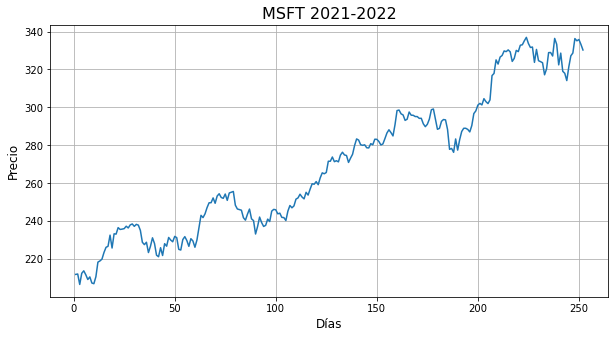

In [67]:
start = "2021-01-01"
end = "2022-01-01"
msft = yfinance.Ticker("MSFT")
datos_msft = msft.history(start=start, end=end)
datos_msft.head()
datos = pd.DataFrame(datos_msft['Close'], datos_msft.index)
precios = datos_msft['Close'].values
fechas = datos_msft.index
dias = len(fechas)

plt.figure(figsize=(10, 5))  
plt.plot(np.arange(1, dias+1), precios)
plt.title('MSFT 2021-2022', fontsize=16)  
plt.xlabel('Días', fontsize=12)  
plt.ylabel('Precio', fontsize=12)  
plt.grid()  
plt.show() 


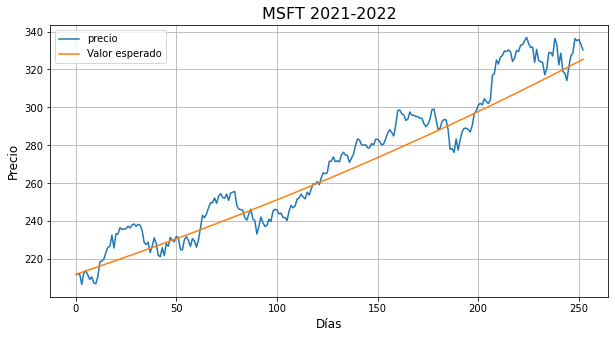

In [144]:
def media(s0, a, b, t):
    return s0*np.exp((a-b)*t)

plt.figure(figsize=(10, 5))  
plt.plot(np.arange(1, dias+1), precios, label='precio')
vals = np.arange(0, dias + 1)
plt.plot(vals, media(s0, 0.002, 0.0003, vals), label='Valor esperado') # parametros ya estimados con datos del 2020
plt.title('MSFT 2021-2022', fontsize=16)  
plt.xlabel('Días', fontsize=12)  
plt.ylabel('Precio', fontsize=12) 
plt.grid()
plt.legend()

 $\text{Observamos que el precio sigue al modelo del 2020-2021}$